In [1]:
import numpy as np
import pandas as pd
import datetime

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')
plt.rc('figure', figsize=(16,10))
plt.rc('lines', markersize=4)

In [2]:
start_date = datetime.date(2009, 3,8)
end_date = datetime.date.today()

In [3]:
data = pd.read_csv("sap_stock.csv", low_memory = False, skiprows = 1, encoding = "ISO-8859-1")

In [4]:
print("The GTD dataset has {} samples with {} features.".format(*data.shape))

The GTD dataset has 2550 samples with 11 features.


In [5]:
data.head()

,Date,Open,High,Low,Close,Change,Traded Volume,Turnover,Last Price of the Day,Daily Traded Units,Daily Turnover
0,2009-03-09,25.16,25.82,24.48,25.59,NaN,5749357.0,145200289.0,NaN,NaN,NaN
1,2009-03-10,25.68,26.95,25.68,26.87,NaN,7507770.0,198480965.0,NaN,NaN,NaN
2,2009-03-11,26.50,26.95,26.26,26.64,NaN,5855095.0,155815439.0,NaN,NaN,NaN
3,2009-03-12,26.15,26.47,25.82,26.18,NaN,6294955.0,164489409.0,NaN,NaN,NaN
4,2009-03-13,26.01,26.24,25.65,25.73,NaN,6814568.0,176228331.0,NaN,NaN,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   2550 non-null   object 
 1   Open                   2242 non-null   float64
 2   High                   2543 non-null   float64
 3   Low                    2543 non-null   float64
 4   Close                  2550 non-null   float64
 5   Change                 11 non-null     float64
 6   Traded Volume          2504 non-null   float64
 7   Turnover               2497 non-null   float64
 8   Last Price of the Day  0 non-null      float64
 9   Daily Traded Units     0 non-null      float64
 10  Daily Turnover         7 non-null      float64
dtypes: float64(10), object(1)
memory usage: 219.3+ KB


In [7]:
data.describe()

,Open,High,Low,Close,Change,Traded Volume,Turnover,Last Price of the Day,Daily Traded Units,Daily Turnover
count,2242.000000,2543.000000,2543.000000,2550.000000,11.000000,2.504000e+03,2.497000e+03,0.0,0.0,7.0
mean,56.686896,61.563225,60.535073,60.995955,-0.070000,3.296818e+06,1.828440e+08,NaN,NaN,0.0
std,18.320821,21.184135,20.934460,21.097480,0.709761,2.004323e+06,9.350710e+07,NaN,NaN,0.0
min,25.160000,25.820000,24.480000,25.590000,-0.740000,0.000000e+00,1.767350e+05,NaN,NaN,0.0
25%,41.500000,43.430000,42.590000,42.950000,-0.500000,2.131686e+06,1.300462e+08,NaN,NaN,0.0
50%,56.560000,58.480000,57.580000,58.015000,-0.290000,2.852772e+06,1.626544e+08,NaN,NaN,0.0
75%,67.732500,78.365000,77.085000,77.762500,0.085000,3.878528e+06,2.104511e+08,NaN,NaN,0.0
max,100.100000,108.520000,107.020000,107.800000,1.250000,3.645671e+07,1.369431e+09,NaN,NaN,0.0


In [8]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Change', 'Traded Volume',
       'Turnover', 'Last Price of the Day', 'Daily Traded Units',
       'Daily Turnover'],
      dtype='object')

In [9]:
df = pd.DataFrame(data, columns=['Date','Close'])

In [10]:
df = df.reset_index()

In [11]:
df.head()

,index,Date,Close
0,0,2009-03-09,25.59
1,1,2009-03-10,26.87
2,2,2009-03-11,26.64
3,3,2009-03-12,26.18
4,4,2009-03-13,25.73


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   2550 non-null   int64  
 1   Date    2550 non-null   object 
 2   Close   2550 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.9+ KB


In [13]:
df.isna().values.any()

False

#### Exploring the data

In [14]:
import matplotlib.dates as mdates

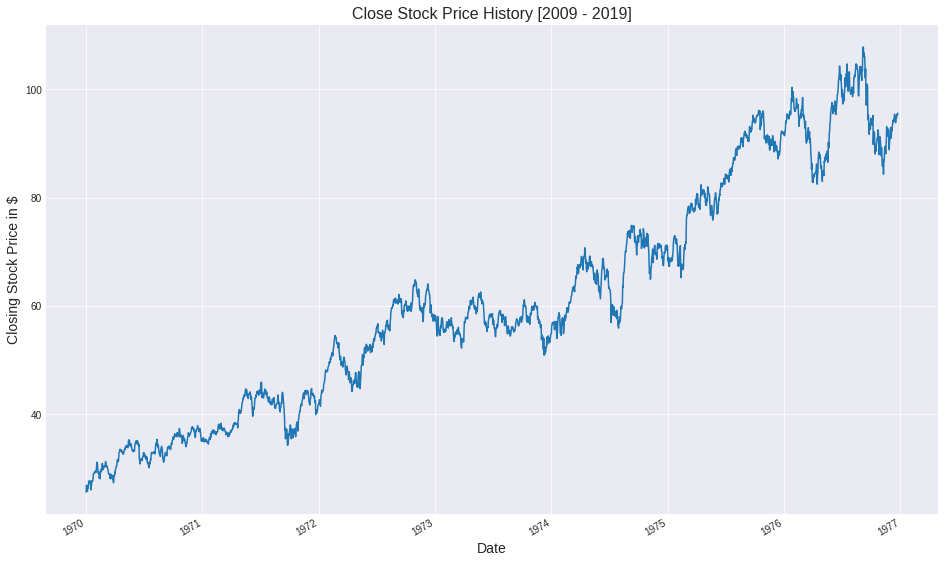

In [15]:
import matplotlib.dates as mdates

years = mdates.YearLocator()
yearsFmt = mdates.DateFormatter('%Y') 


fig, ax = plt.subplots()
ax.plot(df['Date'], df['Close'])


ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)


plt.title('Close Stock Price History [2009 - 2019]', fontsize=16)

plt.xlabel('Date', fontsize=14)

plt.ylabel('Closing Stock Price in $', fontsize=14)

fig.autofmt_xdate()

plt.show()

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
train, test = train_test_split(df, test_size=0.20)

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
X_train = np.array(train.index).reshape(-1, 1)
y_train = train['Close']

In [20]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [21]:
print('Slope: ', np.squeeze(model.coef_).item() )
print('Intercept: ', model.intercept_)

Slope:  0.027630317501023162
Intercept:  25.759519028815227


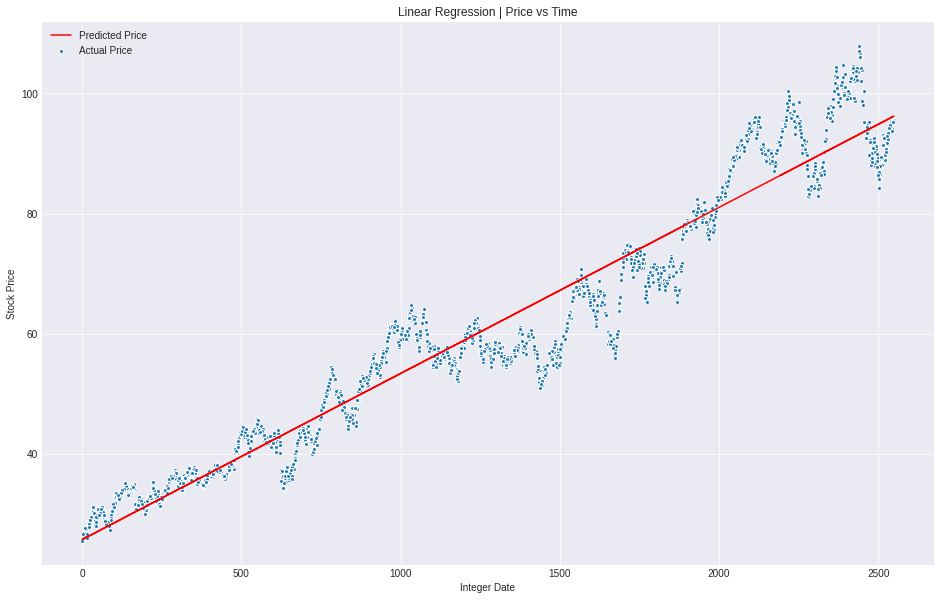

In [22]:
plt.figure(1, figsize=(16,10))
plt.title('Linear Regression | Price vs Time')
plt.scatter(X_train, y_train, edgecolor='w', label='Actual Price')
plt.plot(X_train, model.predict(X_train), color='r', label='Predicted Price')
plt.xlabel('Integer Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [23]:
X_test = np.array(test.index).reshape(-1, 1)
y_test = test['Close']

In [24]:
y_pred = model.predict(X_test)
print(y_pred[0:25])

[41.64695159 90.99469865 37.36425238 55.76604383 84.63972562 44.99022001
 86.24228404 42.72453397 63.36438115 47.5045789  72.34423434 64.91167893
 45.21126255 88.3974488  84.77787721 50.70969573 26.06345252 43.47055255
 55.48974066 79.91494133 39.90624159 64.46959385 48.6097916  71.26665195
 47.06249382]


In [25]:
df.shape

(2550, 3)

In [26]:
print(type(y_pred))

randints = np.random.randint(2550, size=24)


df_sample = df[df.index.isin(randints)]
df_sample['Prediction']=y_pred[0:24]

<class 'numpy.ndarray'>


<ipython-input-26-c5e8c2cddacb>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sample['Prediction']=y_pred[0:24]


In [27]:
df_sample.head()

,index,Date,Close,Prediction
126,126,2009-09-01,33.87,41.646952
191,191,2009-12-01,32.06,90.994699
233,233,2010-01-28,32.18,37.364252
455,455,2010-12-08,36.67,55.766044
528,528,2011-03-23,41.01,84.639726


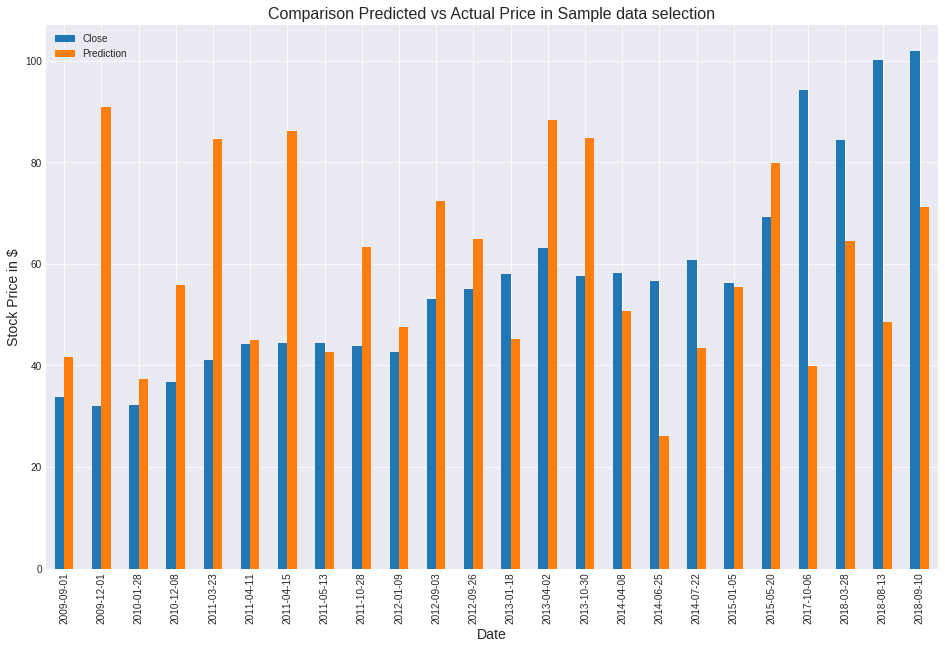

In [28]:
fig, ax = plt.subplots()
df_sample.plot(x='Date', y=['Close', 'Prediction'], kind='bar', ax=ax)


plt.title('Comparison Predicted vs Actual Price in Sample data selection', fontsize=16)

plt.xlabel('Date', fontsize=14)

plt.ylabel('Stock Price in $', fontsize=14)

plt.show()


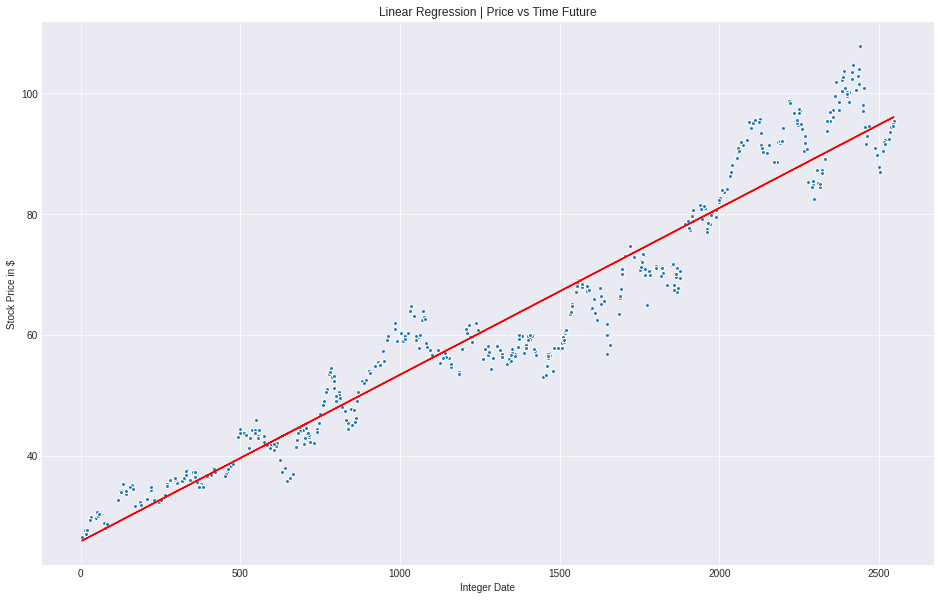

In [29]:
plt.figure(1, figsize=(16,10))
plt.title('Linear Regression | Price vs Time Future')
plt.plot(X_test, model.predict(X_test), color='r', label='Predicted Price')
plt.scatter(X_test, y_test, edgecolor='w', label='Actual Price')

plt.xlabel('Integer Date')
plt.ylabel('Stock Price in $')

plt.show()

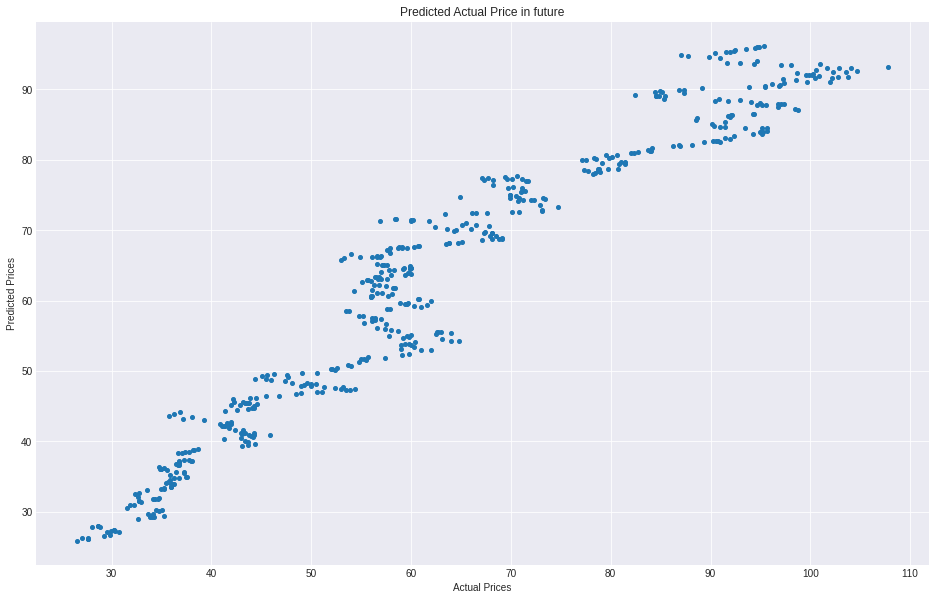

In [30]:
plt.scatter(y_test, y_pred)

plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

plt.title('Predicted Actual Price in future')

plt.show()

/home/anjali/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


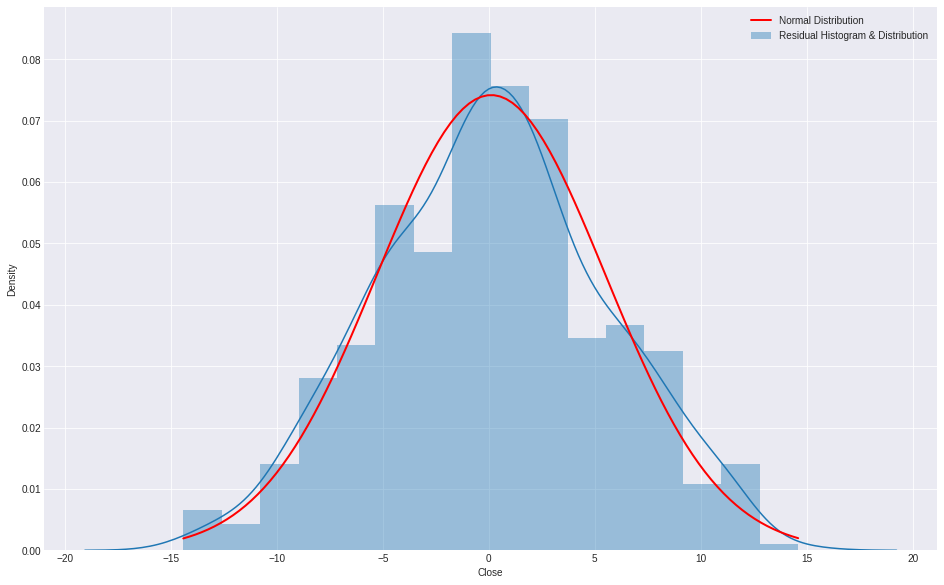

In [31]:
from scipy.stats import norm


mu, std = norm.fit(y_test - y_pred)

ax = sns.distplot((y_test - y_pred), label='Residual Histogram & Distribution')

x = np.linspace(min(y_test - y_pred), max(y_test - y_pred), 100)
p = norm.pdf(x, mu, std)

ax.plot(x, p, 'r', lw=2, label='Normal Distribution') 

plt.legend()
plt.show()

In [32]:
df['Prediction'] = model.predict(np.array(df.index).reshape(-1, 1))

In [33]:
df.head()

,index,Date,Close,Prediction
0,0,2009-03-09,25.59,25.759519
1,1,2009-03-10,26.87,25.787149
2,2,2009-03-11,26.64,25.814780
3,3,2009-03-12,26.18,25.842410
4,4,2009-03-13,25.73,25.870040


In [34]:
from sklearn import metrics

In [35]:
df['Close'].describe()


count    2550.000000
mean       60.995955
std        21.097480
min        25.590000
25%        42.950000
50%        58.015000
75%        77.762500
max       107.800000
Name: Close, dtype: float64

In [36]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.301581283998451
Mean Squared Error: 28.95331816038608
Root Mean Squared Error: 5.380828761481458


In [37]:
print('R2: ', metrics.r2_score(y_test, y_pred))

R2:  0.9345894243628705


In [38]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test, y_pred)

0.9346157661384985